In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
# Load the dataset
df = pd.read_csv("Car_sales.csv")

In [4]:
# 1. Read top five values
print("Top 5 Rows:\n", df.head())

Top 5 Rows:
     Manufacturer              Model  Sales in thousands 4-year resale value  \
0  Acura          Integra                        16.919               16.36   
1  Acura          TL                             39.384              19.875   
2  Acura          CL                             14.114              18.225   
3  Acura          RL                              8.588              29.725   
4  Audi           A4                             20.397              22.255   

  Vehicle type Price in thousands Engine size Horsepower Wheelbase Width  \
0    Passenger               21.5         1.8        140     101.2  67.3   
1    Passenger               28.4         3.2        225     108.1  70.3   
2    Passenger                  .         3.2        225     106.9  70.6   
3    Passenger                 42         3.5        210     114.6  71.4   
4    Passenger              23.99         1.8        150     102.6  68.2   

  Length Curb weight Fuel capacity Fuel efficiency Late

In [5]:
# 2. DataFrame info and data types

print("\nData Types:\n", df.dtypes)


Data Types:
 Manufacturer            object
Model                   object
Sales in thousands     float64
4-year resale value     object
Vehicle type            object
Price in thousands      object
Engine size             object
Horsepower              object
Wheelbase               object
Width                   object
Length                  object
Curb weight             object
Fuel capacity           object
Fuel efficiency         object
Latest Launch           object
dtype: object


In [6]:
# 3. Number of rows and columns

print("\nShape (Rows, Columns):", df.shape)


Shape (Rows, Columns): (157, 15)


In [7]:
# 4. Detect and show duplicate rows

duplicates = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {duplicates.shape[0]}")
if not duplicates.empty:
    print("\nDuplicate rows:\n", duplicates)

# Drop duplicates
df = df.drop_duplicates()



Number of duplicate rows: 0


In [8]:
# 5. Shape after dropping duplicates

print("\nShape after dropping duplicates:", df.shape)


Shape after dropping duplicates: (157, 15)


In [9]:
# 6. Summary statistics for numerical variables

print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        Sales in thousands
count          157.000000
mean            52.998076
std             68.029422
min              0.110000
25%             14.114000
50%             29.450000
75%             67.956000
max            540.561000


In [10]:
# 7. Missing values in each column

print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64


In [11]:
# 8. Drop the column with most missing values

most_miss_col = df.isnull().sum().idxmax()
print(f"\nDropping column with most missing values: {most_miss_col}")
df = df.drop(columns=[most_miss_col])



Dropping column with most missing values: Manufacturer


In [12]:
# 9. Drop rows with categorical missing values

cat_cols = df.select_dtypes(include='object').columns
before_drop = df.shape[0]

df = df.dropna(subset=cat_cols)
after_drop = df.shape[0]

print(f"\n#9. Dropped {before_drop - after_drop} rows with missing categorical values.")



#9. Dropped 0 rows with missing categorical values.


In [13]:
# 10. Import rows with numerical missing values

num_cols = df.select_dtypes(include=np.number).columns
rows = df[df[num_cols].isnull().any(axis=1)]
print("\nRows with numerical missing values:\n", rows)


Rows with numerical missing values:
 Empty DataFrame
Columns: [Model, Sales in thousands, 4-year resale value, Vehicle type, Price in thousands, Engine size, Horsepower, Wheelbase, Width, Length, Curb weight, Fuel capacity, Fuel efficiency, Latest Launch]
Index: []


In [14]:
# 11. Sort by price and show most/least expensive cars

df_sorted = df.sort_values(by='Price in thousands')
print("\nLeast Expensive Car:\n", df_sorted.iloc[0])
print("\nMost Expensive Car:\n", df_sorted.iloc[-1])


Least Expensive Car:
 Model                  CL               
Sales in thousands                14.114
4-year resale value               18.225
Vehicle type                   Passenger
Price in thousands                     .
Engine size                          3.2
Horsepower                           225
Wheelbase                          106.9
Width                               70.6
Length                               192
Curb weight                         3.47
Fuel capacity                       17.2
Fuel efficiency                       26
Latest Launch                   1-Apr-14
Name: 2, dtype: object

Most Expensive Car:
 Model                  Accent           
Sales in thousands                41.184
4-year resale value                 5.86
Vehicle type                   Passenger
Price in thousands                 9.699
Engine size                          1.5
Horsepower                            92
Wheelbase                           96.1
Width                         

In [15]:
# 12. Function to find min and max of any column

def find_min_max(column):
    return column.min(), column.max()

In [16]:
# 13. Use function for horsepower, length, fuel efficiency

print("\nMin/Max Horsepower:", find_min_max(df['Horsepower']))
print("Min/Max Length:", find_min_max(df['Length']))
print("Min/Max Fuel Efficiency:", find_min_max(df['Fuel efficiency']))


Min/Max Horsepower: ('.', '92')
Min/Max Length: ('.', '224.5')
Min/Max Fuel Efficiency: ('.', '45')


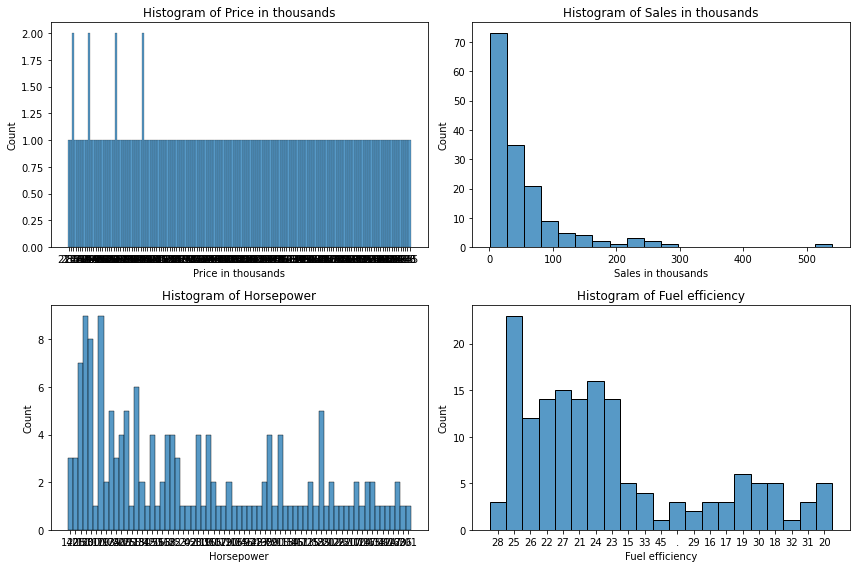

In [17]:
# 14. Plot histograms

plt.figure(figsize=(12, 8))
cols = ['Price in thousands', 'Sales in thousands', 'Horsepower', 'Fuel efficiency']
for i, col in enumerate(cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col].dropna(), bins=20)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


'Length' column data type: float64


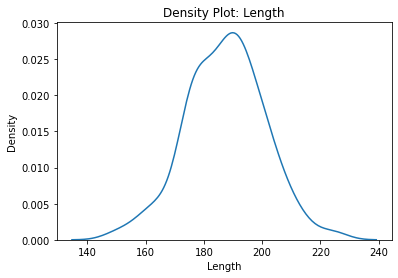

In [18]:
# Ensure 'Length' is numeric
df['Length'] = pd.to_numeric(df['Length'], errors='coerce')

# Drop NaNs before plotting
length_clean = df['Length'].dropna()

# Confirm the dtype
print(f"'Length' column data type: {length_clean.dtype}")

# Plot KDE only if it's numeric
if np.issubdtype(length_clean.dtype, np.number):
    plt.figure(figsize=(6, 4))
    sns.kdeplot(length_clean)
    plt.title("Density Plot: Length")
    plt.xlabel("Length")
    plt.show()
else:
    print("Error: 'Length' column is not numeric.")


In [19]:
#16. Count by category –group by manufacture

# Extract manufacturer name from the 'Model' column (first word)
df['Manufacturer'] = df['Model'].str.split().str[0]

# Count by category (manufacturer)
manufacturer_counts = df['Manufacturer'].value_counts()

print("\nCount by Manufacturer:\n", manufacturer_counts)



Count by Manufacturer:
 Manufacturer
Grand      4
Ram        3
Sebring    2
Montero    2
Neon       2
          ..
Contour    1
Mustang    1
Escort     1
Caravan    1
S80        1
Name: count, Length: 147, dtype: int64


In [20]:
cat_df = df.select_dtypes(include="object")
print("\nCategorical Columns:\n", cat_df.columns)



Numerical Columns:
 Index(['Model', '4-year resale value', 'Vehicle type', 'Price in thousands',
       'Engine size', 'Horsepower', 'Wheelbase', 'Width', 'Curb weight',
       'Fuel capacity', 'Fuel efficiency', 'Latest Launch', 'Manufacturer'],
      dtype='object')


In [21]:
# 17. Select all numerical variables

num_df = df.select_dtypes(include=np.number)
print("\nNumerical Columns:\n", num_df.columns)


Numerical Columns:
 Index(['Sales in thousands', 'Length'], dtype='object')


In [22]:
# 18. Correlation of price and sales

# Convert both columns to numeric, coercing errors to NaN
df['Price in thousands'] = pd.to_numeric(df['Price in thousands'], errors='coerce')
df['Sales in thousands'] = pd.to_numeric(df['Sales in thousands'], errors='coerce')

# Drop rows where either column is NaN
df_cleaned = df.dropna(subset=['Price in thousands', 'Sales in thousands'])

# Compute correlation
cor = df_cleaned['Price in thousands'].corr(df_cleaned['Sales in thousands'])

print(f"\n✅ Correlation between Price and Sales: {cor:.4f}")



✅ Correlation between Price and Sales: -0.3047


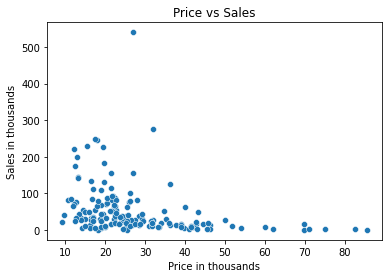

In [41]:
# 19. Scatterplot of price vs sales

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Price in thousands', y='Sales in thousands')
plt.title("Price vs Sales")
plt.show()

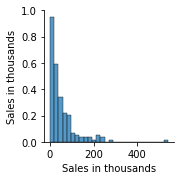

In [42]:
# 20. Pairplot of numerical variables

sns.pairplot(df[num_cols.dropna()])
plt.show()

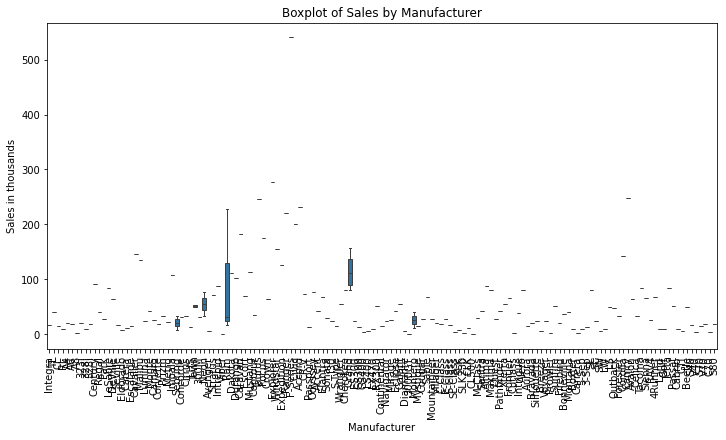

In [43]:
# 21. Boxplot of sales by manufacturer

plt.figure(figsize=(12, 6))
sns.boxplot(x='Manufacturer', y='Sales in thousands', data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Sales by Manufacturer")
plt.show()

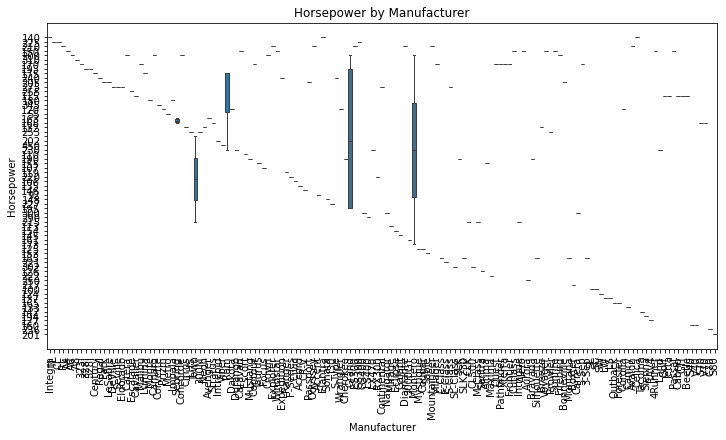

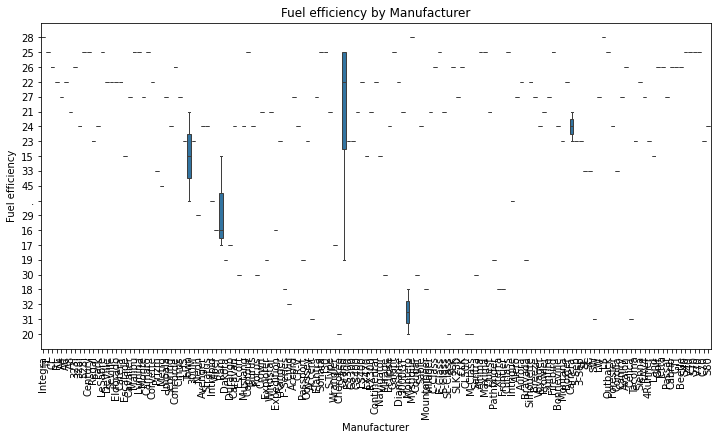

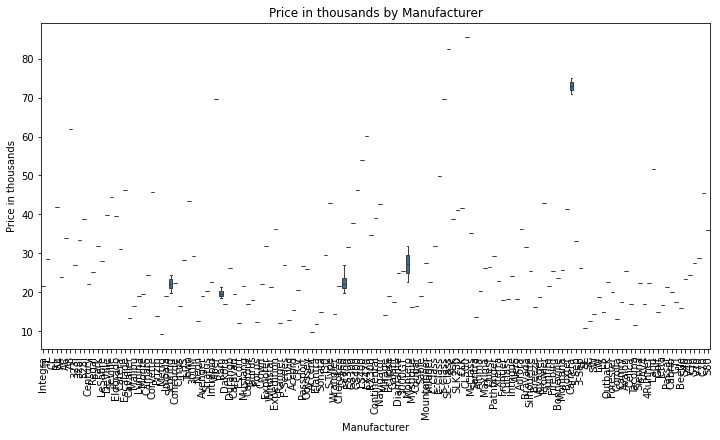

In [44]:
# 22. Boxplots of numerical variables w.r.t Manufacturer

for col in ['Horsepower', 'Fuel efficiency', 'Price in thousands']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Manufacturer', y=col, data=df)
    plt.xticks(rotation=90)
    plt.title(f"{col} by Manufacturer")
    plt.show()


In [46]:
# 23. Separate input (X) and output (y)

y = df['Sales in thousands']
X = df.drop(columns=['Sales in thousands'])

In [54]:
# 24. Encode categorical variables with LabelEncoder

le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])


In [61]:
# 25. One-hot encode vehicle type

# Re-load or reset your data if needed before this point

# One-hot encode 'Vehicle type' first
X = pd.get_dummies(X, columns=['Vehicle type'], drop_first=True)

# Then apply LabelEncoder to remaining object columns
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

# Confirm changes
print("✅ Categorical encoding complete")
print("X columns after encoding:", X.columns)


KeyError: "None of [Index(['Vehicle type'], dtype='object')] are in the [columns]"

In [59]:
# 26. Split dataset into train/test (70% train, 10% test)

from sklearn.model_selection import train_test_split

# Split dataset: 90% train, 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Print confirmation
print("✅ Dataset split complete:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



✅ Dataset split complete:
X_train shape: (141, 14)
X_test shape: (16, 14)
y_train shape: (141,)
y_test shape: (16,)


In [60]:
# 27. Feature scaling
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("\nData Preprocessing and Visualization Completed ✅")

KeyError: "None of [Index(['Sales in thousands'], dtype='object')] are in the [columns]"